In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.manifold import TSNE
import scipy.io
import os

from functions import FC, dFC, v_dFC, dFC_stream, v_stream, dFC_matrix, pooled_v_stream, tSNE_evolution

## Import data

In [2]:
#Fake data
df = pd.DataFrame({})
regions = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "L"]

for i in range(len(regions)):
  df.insert(i, column=regions[i], value=np.random.laplace(size=int(1e6)))

In [3]:
#Open multiple dataset from "./data/" folder
datasets = []
for file in os.listdir("data"):
    try:
        data = scipy.io.loadmat("./data/" + file)
        data = pd.DataFrame(data["tseries"].T)
        datasets.append(data)
    except:
        print("Problem with \"" + str(file) + "\" file")

print("Uploaded " + str(len(datasets)) + " file")

Uploaded 96 file


## Single-dataset analysis

In [4]:
#First dataset as example
df = datasets[0]
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
1195,11933.332031,10400.516602,11724.568359,8831.385742,9866.129883,11570.536133,9030.969727,10187.760742,11311.445312,9443.164062,...,12637.740035,12712.843639,12225.258843,12495.463547,9189.928298,8127.986145,11785.911671,11737.220677,13557.633649,13368.737246
1196,12086.116211,10353.671875,11773.430664,8850.895508,9917.520508,11532.392578,9049.121094,10192.680664,11320.247070,9426.386719,...,12657.091495,12605.522809,12191.441895,12405.275262,9222.355222,8420.748088,11735.439007,11708.831543,13558.222645,13279.524654
1197,11976.525391,10406.337891,11740.424805,8882.874023,9917.004883,11579.981445,9038.181641,10216.816406,11343.063477,9440.373047,...,12520.953623,12552.891160,12191.827005,12401.572955,9185.558949,8396.586762,11785.536077,11746.542023,13571.814435,13389.971803
1198,12001.046875,10356.809570,11723.058594,8950.310547,9917.669922,11654.763672,9055.362305,10236.859375,11341.457031,9409.737305,...,12611.882931,12735.182900,12164.077258,12338.561340,9289.835084,8198.480337,11862.377585,11812.205428,13642.366156,13434.009048
1199,11961.538086,10391.638672,11740.092773,9007.593750,9993.359375,11636.715820,9053.779297,10227.751953,11335.183594,9390.774414,...,12560.940600,12686.325053,12204.901461,12367.321051,9167.657212,8312.074095,11905.902900,11867.208830,13688.051387,13341.839722


<Axes: >

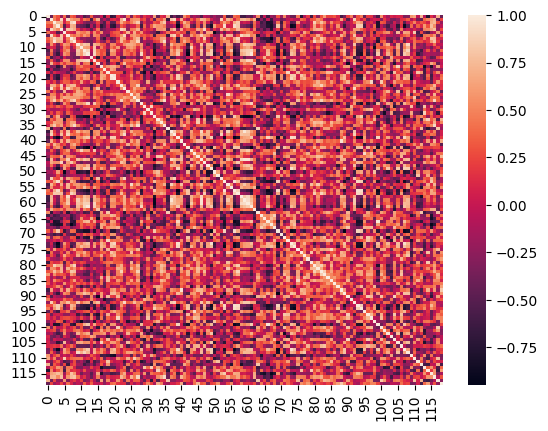

In [5]:
stream = dFC_stream(df, 8)

FC_0 = stream[0]
sn.heatmap(FC_0)

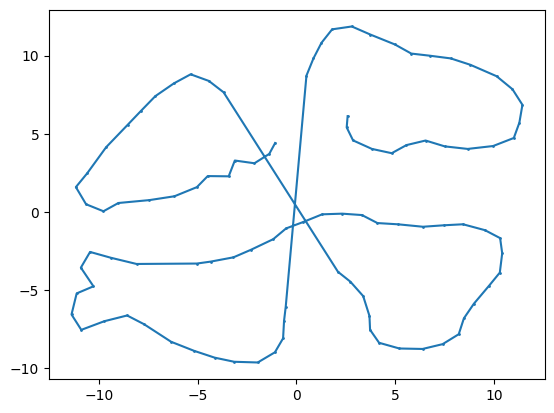

In [6]:
random_walk = tSNE_evolution(stream, TSNE, 2)

plt.scatter(random_walk[0], random_walk[1], s=1)
plt.plot(random_walk[0], random_walk[1])

<Axes: >

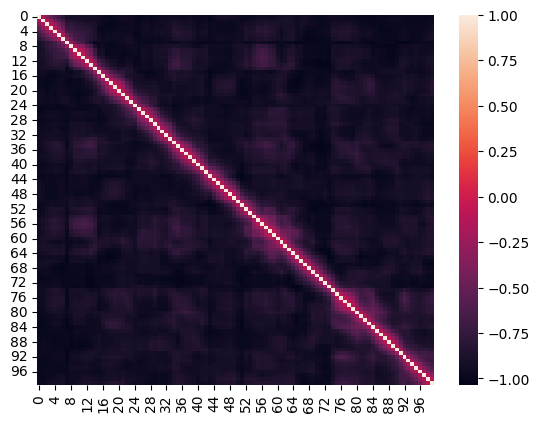

In [7]:
autocorrelation = dFC_matrix(stream)

sn.heatmap(autocorrelation)

(array([ 9., 17., 15., 14., 12., 16.,  3.,  5.,  6.,  2.]),
 array([0.01341946, 0.01767656, 0.02193367, 0.02619078, 0.03044789,
        0.034705  , 0.03896211, 0.04321922, 0.04747633, 0.05173344,
        0.05599055]),
 <BarContainer object of 10 artists>)

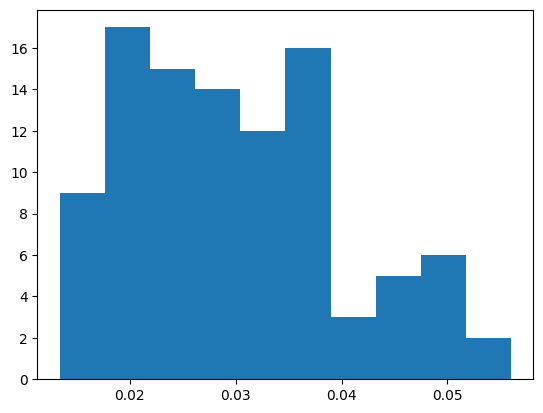

In [26]:
v_dist = pooled_v_stream(df, 21, 21)

plt.hist(v_dist)

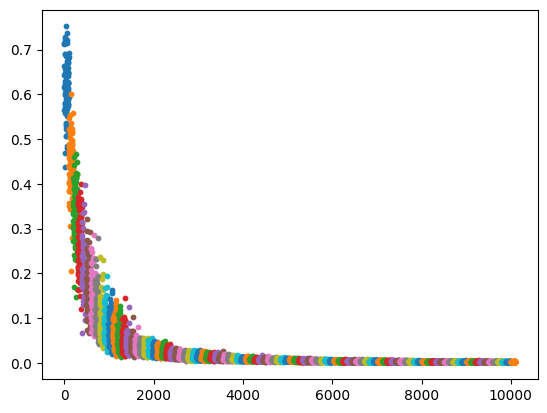

In [41]:
v = np.array([])
for i in np.arange(3, 105):
    v_i = pooled_v_stream(df, i, i)
    plt.scatter(np.arange(start=len(v), stop=(len(v)+len(v_i))), v_i, s=10)

    v = np.concatenate((v, v_i)) 

## More analysis

**ranges**:  *short* (3-8 TRs), *mid* (9-32 TRs), *long* (33-105 TRs) 

In [38]:
v_dist_global = np.array([])

for data in datasets[:2]:
    v_dist_single = pooled_v_stream(df, 33, 105)
    v_dist_global = np.concatenate((v_dist_global, v_dist_single))

(array([6682., 4224., 1924.,  820.,  458.,  198.,   80.,   36.,   20.,
          12.]),
 array([0.00084186, 0.00358669, 0.00633152, 0.00907635, 0.01182118,
        0.01456601, 0.01731084, 0.02005567, 0.0228005 , 0.02554533,
        0.02829016]),
 <BarContainer object of 10 artists>)

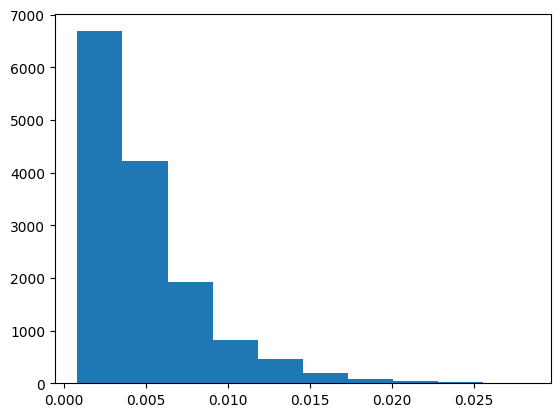

In [39]:
plt.hist(v_dist_global)

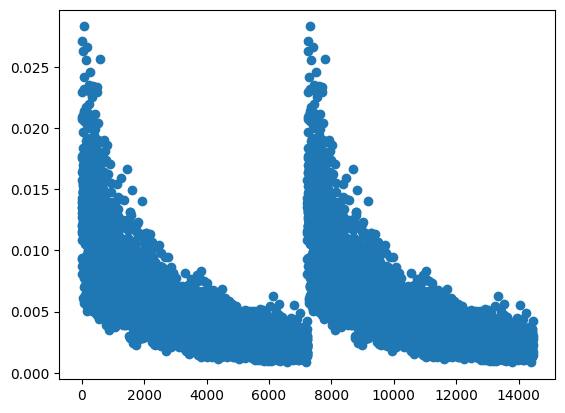

In [40]:
plt.scatter(np.arange(len(v_dist_global)), v_dist_global)